<a href="https://colab.research.google.com/github/gmae199boy/ai_deeplearning/blob/main/deep_learning_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 밑바닥부터 시작하는 딥러닝


In [3]:
%cd drive/MyDrive/deep-learning/

/content/drive/MyDrive/deep-learning


## 퍼셉트론
- 가중치와 편향
  - 세타에 -b를 넣으면 x1w1 + x2w2 + b <= 0 == 0, x1w1 + x2w2 + b > 0 == 1이 된다
- 퍼셉트론은 직선만 그릴 수 있으므로 XOR은 나타낼 수 없다 -> 비선형이기 때문에
  - x1, x2가 NAND, OR 게이트에 입력되고, NAND, OR의 출력이 AND로 입력되면 XOR게이트 완성
  - 다층 퍼셉트론

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 이 값이 0보다 작거나 같으면 0, 크면 1
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5]) # AND와는 가중치(x, b)만 다르다
  b = 0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 0

def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y
  

## 신경망
- 퍼셉트론의 단점(가중치를 수동으로 설정)을 자동으로 학습하게 해주는것
- 활성화 함수 (activation function)
  -  y = h(b + w1x1 + w2x2)
  - h(x) = 0 (x <= 0), 1 (x > 0)
  - h(x)를 활성화 함수라 한다
  - a = b + w1x1 + w2x2, y = h(a)
  - 신경망의 동작을 더명확히 드러내고자 할 때는 활성화 처리과정을 노드에 그린다
- 계단 함수 (step function)
  - 임계값을 경계로 출력이 바뀌는 함수 (활성화 함수)
  - 그래서 퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다
- 활성화 함수는 여러 함수중 계단 함수를 사용하고 있음
- 활성화 함수를 계단 함수에서 다른 함수로 변경하는 것이 신경망의 세계로 가는 길
- 시그모이드 함수 (sigmoid function)
  - h(x) = 1 / 1 + exp(-x)
  - 신경망에서는 활성화 함수로 시그모이드 함수를 사용해 신호를 변환, 다음 뉴런에 전달
  - 퍼셉트론과 신경망의 주된 차이는 활성화 함수가 다르다는 것 뿐

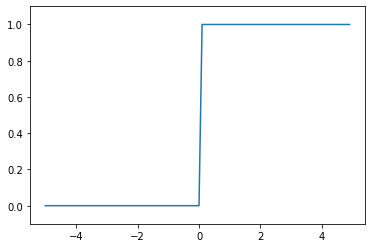

In [ ]:
# 계단 함수
# def step_function(x):
#   if x > 0:
#     return 1
#   else:
#     return 0

def step_function(x):
  return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()


- 이렇게 생겼기 때문에 계단 함수라 불림

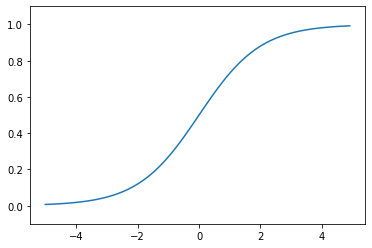

In [ ]:
# 시그모이드 함수
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

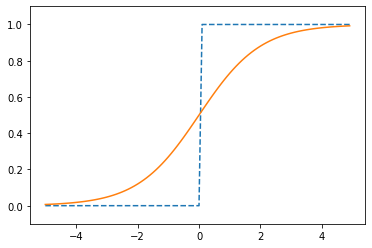

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y, linestyle="--")
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

- 시그모이드의 이런 입력에 따라 출력이 연속적으로 변화하는 매끄러움이 신경망 학습에서 ***아주 중요***하다
- 퍼셉트론에선 0 ,1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다
- 둘 다 입력이 커지면 출력이 1에 가까워지고 반대인 경우는 0에 가까워지고 0, 1사이의 값만 반환한다는 것이 공통점
- 둘 다 비선형 함수이다
- 신경망은 층을 깊게 해야 하기 때문에 선형함수를 사용할 수 없다
 

- ReLU (rectified Linear Unit, 렐루) 함수
  - 시그모이드는 오래전부터 사용해왔으나, 최근에는 렐루를 주로 사용함
  - 렐루는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력한다
  - h(x) = x (x > 0), 0 (x <= 0)


In [ ]:
# ReLU 함수
def relu(x):
  return np.maximum(0, x) # maximum은 두 입력 값 중 큰 값을 반환

# np.ndim(x) -> 배열의 차원 수

- 3층 신경망

In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1

Z1 = sigmoid(A1)

print(Z1) # 1층

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(Z2) # 2층

# 항등 함수
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3

y = identity_function(A3)
print(y)

[0.57444252 0.66818777 0.75026011]
[0.62624937 0.7710107 ]
[0.31682708 0.69627909]


- 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정함
  - 회귀 -> 항등 함수
  - 2클래스 분류 -> 시그모이드
  - 다중클래스 -> 소프트맥스

### 정리

In [ ]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

# backward(역방향)도 있음
# forward는 (순방향)
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


- 소프트맥스 함수 (softmax function)
  - 오버플로우의 문제가 있다
  - 분수에 상수 C를 곱하면 결과는 결국 같기 때문에 ak에 c를 더한다
  - 입력 신호 중 최댓값을 대입한다
  - 소프트맥스의 출력 총합은 항상 1이다. 그래서 출력을 ***확률***로 해석할 수 있다
  - 소프트맥스를 적용해도 원소간의 대소관계는 변하지 않는다. a에서 2번째 원소가 제일 크다면 y에서 제일 큰 원소도 2번째이다. 그래서 신경망으로 분류를 할때는 출력층의 소프트맥스 함수를 생략해도 된다.
  - 학습과 추론 단계가 있는데, 추론 단계에서는 함수를 생략하는 것이 일반적이지만 학습시킬 때에는 출력층에서 함수를 사용한다.

In [ ]:
# 오버플로우를 염두에 두지 않은 식
def softmax_function(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [ ]:
# 오버플로우를 막는 식
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

- 출력층의 뉴런 수
  - 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적
  - 밑의 예는 입력층 뉴런이 784개 이다. 이는 이미지 크기가 28 * 28 = 784 이기 때문이다.
  - 출력층은 10개 이다. 숫자 0 ~ 9까지를 구분하는 문제이기 때문.
  - 은닉층은 2개로 첫 번째 은닉층은 50개의 뉴런, 두 번째는 100개의 뉴런. 이것은 임의로 정한 값

In [ ]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from PIL import Image
import pickle

def get_data():
  (x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False, one_hot_label=False)
  return x_test, t_test

def init_network():
  with open("ch03/sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [ ]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    # 이건 일반 용
    # pil_img.show()

    # 이건 구글 코랩용
    display(pil_img)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)
# plt.imshow(img)
# plt.show()


5
(784,)
(28, 28)


In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다
  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.9207


- 0 ~ 1의 범위로 만드는것 -> 정규화 (max 값을 나누면 됨)
- 신경망의 입력 데이터에 특정 변환을 가하는 것 -> 전처리
- 배치 (batch)
  - 여러개의 입력 데이터를 하나로 묶은 것(묶음)
  - 수치 계산 라이브러리들은 큰 배열을 효율적으로 처리할 수 있어서 사용
  - 커다란 신경망에서는 데이터 전송이 병목으로 작용하는 경우가 자주 있어, 배치 처리를 함으로써 버스에 주는 부하를 줄일 수 있어 사용
  - 큰 배열을 한꺼번에 처리하는 것이 분할된 작은 배열을 여러 번 처리하는 것 보다 빠름

In [ ]:
batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i + batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i: i + batch_size])

print("Accurary: " + str(float(accuracy_cnt) / len(x)))

Accurary: 0.9207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


## 신경망 학습

- 학습: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- 손실 함수: 신경망이 학습할 수 있도록 해주는 지표
- 경사법: 여기서는 손실 함수의 값을 가급적 작게 만드는 기법으로, 함수의 기울기를 활용함
- 특징(feature): 이미지에서 특징을 추출하고 그 특징의 패턴을 기계학습 기술로 학습시킴
  - 입력 데이터(입력 이미지)에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기
  - 이미지의 특징은 보통 ***벡터***로 기술하고, 컴퓨터 비전 분야에서는 ***SIFT, SURF, HOG*** 등의 특징을 사용
  - 이런 특징을 사용하여 이미지 데이터를 벡터로 변환, 변환된 벡터로 ***지도 학습 방시***의 대표 분류 기법인 ***SVM, KNN*** 등으로 학습
  - 벡터로 변환할 때 사용하는 특징은 여전히 ***사람***이 설계
  - 그러므로 문제에 ***적합한 특징***을 쓰지 않으면 좋은 결과를 못 얻음
  - 사람이 적절한 특징을 생각해야 함
- 신경망은 사람이 개입하지 않고 기계가 이미지를 ***있는 그대로*** 이미지에 포함된 중요한 특징까지 학습함
  - 종단간 기계학습 = 딥러닝 이라고도 함(end-to-end)
- 훈련데이터와 시험 데이터
  - 우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾음
  - 다음 시험 데이터를 사용해 앞서 훈련한 모델의 실력을 평가
- 범용 능력: 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력
- 오버 피팅(overfitting): 한 데이터셋에만 지나치게 최적화된 상태 -> 피해야 하는게 중요한 과제

### 손실 함수
- 현재의 상태를 ***하나의 지표***로 표현
- 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것
- ***하나의 지표***를 기준으로 최적의 매개변수 값을 탐색
- 신경망에서 사용하는 치표는 ***손실 함수***
  - 임의의 한수를 사용할 수 있지만 일반적으로 ***오차제곱합***과 ***교차 엔트로피***를 사용함
  - 손실 함수는 신경망 성능의 ***나쁨***을 나타내는 지표
  - 마이너스를 곱하면 좋음으로 됨

#### 오차제곱합 (sum of squares for errer, SSE)
- 가장 많이 쓰임
- 정답으로 원 핫 인코딩을 씀

In [7]:
import numpy as np

def sum_squares_error(y, t):
  return 0.5 * np.sum((y - t) ** 2)

# 정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 예1 : 2 일 확률이 가장 높다고 추정함
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

# 예2 : 7 일 확률이 가장 높다고 추정함
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


- 정답에 가까울수록 오차가 더 적다

#### 교차 엔트로피 오차
- 정답으로 원 합 인코딩을 씀
- 정답일 때의 출력이 전체 값을 정함

In [9]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

# 정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


- 이것도 오차가 적을수록 정답일 가능성이 높다

#### 미니배치 학습
- 훈련 데이터가 100개 있으면 그로부터 계산한 100개의 손실 함수 값들의 합을 지표로 삼음
- 평균 손실 함수: 교차 엔트로피 오차 식에서 단순히 N으로 나눠 정규화를 함
  - 훈련 데이터의 갯수에 상관없이 통일된 지표를 얻음
- 너무 많은 데이터를 손실함수로 계산하는 것은 비현실적
  - 미니배치 학습: 데이터의 일부를 추려 전체의 ***근사치***로 이용

In [10]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import numpy as np

(x_train, t_train), (x_test, t_test) = \
  load_mnist(flatten=True, normalize=False, one_hot_label=False)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [ ]:
# 배치용 교차 엔트로피 오차 함수
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

# 원 핫 인코딩이 아닌 숫자 레이블이 제공된 교차 엔트로피 오차 함수
# def cross_entropy_error(y, t):
#   if y.ndim == 1:
#     t = t.reshape(1, t.size)
#     y = y.reshape(1, y.size)

#   batch_size = y.shape[0]
#   return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size



#### 왜 손실 함수를 사용함?
- ***정확도*** 지표를 두고 ***손실 함수의 값***을 쓰는 이유는 미분의 역할 때문
- 최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 작게 하는 매개변수 값을 찾음
- 이때 매개변수의 미분(정확히는 기울기)을 계산, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복
- 가중치 매개변수의 손실 함수의 미분은 ***가중치 매개변수의 값을 아주 조금 변화 시켰을 때, 손실 함수가 어떻게 변하냐***
- 만약 미분 값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄임 (반대로도)
- 미분 값이 0이면 손실 함수의 값이 안변하기 때문에 가중치 매개변수의 갱신이 멈춤
- ***신경망을 학습할 때 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 된다.*** 그래서 정확도를 안씀

#### 미분
- 10분에 2KM를 달린 것은 ***평균*** 미분은 ***특정 순간의 변화량***
- 미분은 한순간의 변화량을 표시
- 반올림 오차: h를 무한히 0에 가깝게 구현할 수 없음
- 오차를 줄이기 위해 ***중앙 차분***을 사용 f(x + h) - f(x - h)
  - 이렇게 아주 작은 차분으로 미분하는 것을 ***수치 미분***이라 함
  - 학교에서 배우는 미분은 ***진정한 미분*** 값을 구함 ***해석적으로 미분하다***

In [13]:
# 나쁜 구현의 예
# 반올림 오차 10e-50 = 0.0
def numerical_diff(f, x):
  h = 10e-50
  return (f(x + h) - f(x)) / h

# 개선한 함수
def numerical_diff(f, x):
  h = 1e-4 # 0.0001
  return (f(x + h) - f(x - h)) / (2 * h)


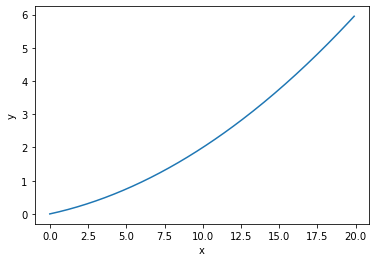

0.1999999999990898
0.2999999999986347


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 수치 미분의 예
def function_1(x):
  return 0.01*x**2 + 0.1*x

# 0에서 20까지 0.1 간격의 배열 x를 만듬
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

print(numerical_diff(function_1, 5)) # 해석적 = 0.2
print(numerical_diff(function_1, 10)) # 해석적 = 0.3

#### 편미분
- 편미분: 변수가 여럿인 함수에 대한 미분

In [ ]:
def function_2(x):
  return x[0]**2 + x[1]**2 # return np.sum(x ** 2)


#### 기울기
- 기울기: 모든 변수의 편미분을 벡터로 정리한 것
- 편미분의 그래프는 3차원이기 때문에 기울기는 ***가장 낮은 장소***를 가리킴
- 가장 낮은 곳에서 멀어질수록 화살표의 크기가 커짐
- 기울기는 각 지점에서 낮아지는 방향을 가리킴
- ***기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향***

In [15]:
def numerical_gradient(f, x):
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

  for idx in range(x.size):
    tmp_val = x[idx]
    # f(x + h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    #f(x - h) 계싼
    x[idx] = tmp_val - h
    fxh2 = f(x)
    grad[idx] = (fxh1 - fxh2) / (2 * h)
    x[idx] = tmp_val # 값 복원

  return grad

#### 경사법 (경사 하강법)
- 신경망은 최적의 매개변수를 학습 시에 찾아야함 (손실 함수가 최솟값이 될 때의 매개변수)
- 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지 짐작할 수 없다
- 기울기를 잘 이용해 함수의 최솟값(또는 가능한 한 작은 값)을 찾으려는것이 ***경사법***
- ***주의*** 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기
  - 그러나 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 즉 그쪽이 정말로 나아갈 방향인지 보장 못함
  - 실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분
  - 경사법은 기울기가 0인 장소를 찾지만 그것은 극솟값이나 안장점일 가능성이 있다
  - 복잡하고 찌그러진 모양의 함수라면 평평한 곳으로 파고들면서 ***고원(plateau)***이라 하는 학습이 진행되지 않는 정체기에 빠질 수 있음
- 그 방향으로 가야 함수의 값을 줄일 수 있다
- 그래서 최솟값이 되는 장소를 찾는 문제(아니면 가능한 한 작은 값이 되는 장소를 찾는 문제)에서는 기울기 정보를 단서로 나아갈 방향을 정해야함    

- 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동함
  - 그 다음 이동한 곳에서도 기울기를 구함
  - 반복
  - 이렇게 함수의 값을 점차 줄이는 것이 ***경사법***
  - 경사법은 기계학습을 최적화하는 데 흔히 쓰는 방법
  - 특히 신경망 학습에는 많이 사용
  - 최솟값은 경사 하강법, 최댓값은 경사 상승법. 근데 - 붙이면 똑같음

- 편미분의 값에 곱하는 n(에타)는 갱신하는 양 -> ***학습률***
  - 학습률은 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것
  - 학습률은 너무 크거나 작으면 ***좋은 장소***를 못찾음
  - 신경망 학습에선 이 학습률 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행

In [ ]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
  return x

- f 는 최적화하려는 함수, init_x는 초깃값, lr은 학습률, step_num은 경사법에 따른 반복 횟수
- 학습률 같은 매개변수를 ***하이퍼파라메터*** 라고 함
  - 가중치와 편향 같은 신경망의 매개변수와는 성질이 다른 매개변수
  - 가중치 매개변수는 자동으로 획득되지만 학습률 같은 하히퍼파라메터는 사람이 직접 설정해야 하기 때문

- 데이터를 미니배치로 무작위로 선정하기 때문에 ***확률적 경사 하강법(stochastic gradient descent, SGD)***라고 함
  - ***확률적으로 무작위로 골라낸 데이터***에 대해 수행하는 경사 하강법
  - 대부분의 딥러닝 프레임위크는 확률적 경사 하강법인 SGD라는 함수로 이 기능을 구현 하고있음

In [ ]:
# coding: utf-8
# 2층 신경망
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads